<a href="https://colab.research.google.com/github/anuragphalke09/anuragphalke09/blob/main/BA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Having had some rough experi...
1,✅ Trip Verified | This comfortable flight wa...
2,Not Verified | Punta Cana Terminal B check in...
3,✅ Trip Verified | The employee at Venice Air...
4,"✅ Trip Verified | I had only 1 bag with me, ..."


In [ ]:
df.to_csv("C:\\Users\\anurag\\Documents\\data\\BA_reviews.csv")


In [ ]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Setup
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load data
df = pd.read_csv("C:\\Users\\anurag\\Documents\\data\\BA_reviews.csv")

# Look at sample
print(df.head())

# Keep only relevant columns (e.g., 'Review Text')
df = df[['reviews']]  # Adjust this if your column names are different
df.dropna(inplace=True)

# Clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                  # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)            # remove punctuation and numbers
    text = text.lower()                                # lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['reviews'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified | Having had some rough experi...
1           1  ✅ Trip Verified |   This comfortable flight wa...
2           2  Not Verified |  Punta Cana Terminal B check in...
3           3  ✅ Trip Verified |   The employee at Venice Air...
4           4  ✅ Trip Verified |   I had only 1 bag with me, ...


Analyzing the data

In [ ]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.9 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned'].apply(get_sentiment)

In [ ]:
positive = (df['sentiment'] > 0).mean()
negative = (df['sentiment'] < 0).mean()
neutral = (df['sentiment'] == 0).mean()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Print topics
for i, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {' '.join(words)}")

Topic 1: ba check passenger hour plane boarding gate staff seat flight
Topic 2: told airway british trip day service hour customer ba flight
Topic 3: food staff airway london british trip airline service hour flight
Topic 4: cabin airline service crew trip business class flight seat ba
Topic 5: cabin service crew trip seat time food ba good flight


In [ ]:
!pip install wordcloud

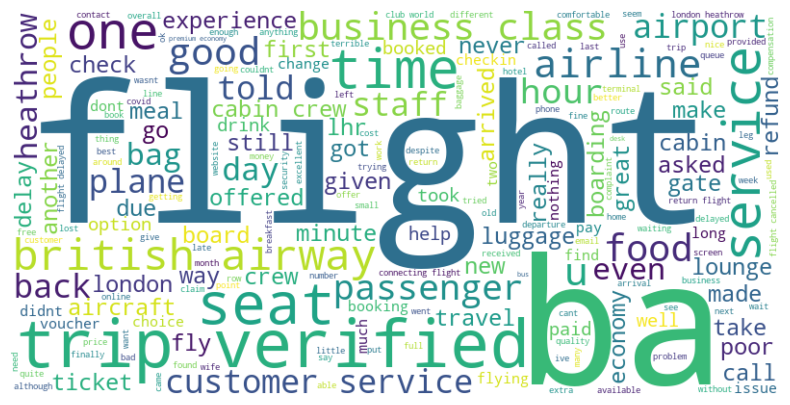

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['cleaned'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save pie chart
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.savefig('sentiment_pie.png')
plt.close()


NameError: name 'sentiment_counts' is not defined

In [ ]:
!pip install python-pptx

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 4.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.6/3.8 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 2.6/3.8 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 3.9 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned']))

# Save to file
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')  # <-- this line saves the image
plt.close()

In [ ]:
from textblob import TextBlob

# Get sentiment polarity
df['sentiment'] = df['cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create sentiment labels
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

# Create and save pie chart
sentiment_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'lightgrey']
)
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.savefig('sentiment_pie.png')  # <-- this saves the file
plt.close()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# Extract top words per topic
topics = []
for i, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-5:]]
    topics.append(f"Topic {i+1}: {' '.join(top_words)}")


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Load template or start a new one
prs = Presentation("C:\\Users\\anurag\\Downloads\\Presentation Template - Task 1.pptx")  # or Presentation() for blank

slide_layout = prs.slide_layouts[5]  # Choose a blank or title-only slide
slide = prs.slides.add_slide(slide_layout)

# Title
title = slide.shapes.title
title.text = "British Airways Review Analysis"

# Add Word Cloud
slide.shapes.add_picture("wordcloud.png", Inches(0.3), Inches(1.3), width=Inches(4.5))

# Add Sentiment Pie Chart
slide.shapes.add_picture("sentiment_pie.png", Inches(5), Inches(1.3), width=Inches(4.5))

# Add Insights/Topics
left = Inches(0.5)
top = Inches(4.8)
width = Inches(9)
height = Inches(1.5)
text_box = slide.shapes.add_textbox(left, top, width, height)
text_frame = text_box.text_frame
text_frame.text = "Key Insights:\n"
for t in topics:
    text_frame.add_paragraph().text = f"• {t}"

# Save presentation
prs.save("BA_review_summary.pptx")


In [ ]:
[
  'Topic 1: service seat flight food crew',
  'Topic 2: airport bag check time luggage',
  'Topic 3: london delay staff economy class'
]


['Topic 1: service seat flight food crew',
 'Topic 2: airport bag check time luggage',
 'Topic 3: london delay staff economy class']

In [ ]:
# Save pie chart
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.savefig('sentiment_pie.png')
plt.close()


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Load template or start a new one
from pptx import Presentation
prs = Presentation()  # creates a blank PowerPoint  # or Presentation() for blank

slide_layout = prs.slide_layouts[5]  # Choose a blank or title-only slide
slide = prs.slides.add_slide(slide_layout)

# Title
title = slide.shapes.title
title.text = "British Airways Review Analysis"

# Add Word Cloud
slide.shapes.add_picture("wordcloud.png", Inches(0.3), Inches(1.3), width=Inches(4.5))

# Add Sentiment Pie Chart
slide.shapes.add_picture("sentiment_pie.png", Inches(5), Inches(1.3), width=Inches(4.5))

# Add Insights/Topics
left = Inches(0.5)
top = Inches(4.8)
width = Inches(9)
height = Inches(1.5)
text_box = slide.shapes.add_textbox(left, top, width, height)
text_frame = text_box.text_frame
text_frame.text = "Key Insights:\n"
for t in topics:
    text_frame.add_paragraph().text = f"• {t}"

# Save presentation
prs.save("BA_review_summary.pptx")

In [ ]:
import os
print("Saving to:", os.getcwd())
prs.save("BA_review_summary.pptx")

Saving to: C:\Users\anurag


In [ ]:
prs.save(r"C:\Users\anurag\Documents\data\BA_review_summary.pptx")